In [1]:
import sys
print(sys.version)

import torch

# 当前安装的 PyTorch 库的版本
print(torch.__version__)
# 检查 CUDA 是否可用，即你的系统有 NVIDIA 的 GPU
print(torch.backends.mps.is_available()) #检查mps是否可用

3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
2.5.1
False


In [ ]:
"""
PyTorch 神经网络基础
神经网络是一种模仿人脑处理信息方式的计算模型，它由许多相互连接的节点（神经元）组成，这些节点按层次排列。

神经网络的强大之处在于其能够自动从大量数据中学习复杂的模式和特征，无需人工设计特征提取器。

随着深度学习的发展，神经网络已经成为解决许多复杂问题的关键技术。

神经元（Neuron）
神经元是神经网络的基本单元，它接收输入信号，通过加权求和后与偏置（bias）相加，然后通过激活函数处理以产生输出。

神经元的权重和偏置是网络学习过程中需要调整的参数。

输入和输出:

输入（Input）：输入是网络的起始点，可以是特征数据，如图像的像素值或文本的词向量。
输出（Output）：输出是网络的终点，表示模型的预测结果，如分类任务中的类别标签。
神经元接收多个输入（例如x1, x2, ..., xn），如果输入的加权和大于激活阈值（activation potential），则产生二进制输出。
"""

"""
神经元的输出可以看作是输入的加权和加上偏置（bias），神经元的数学表示：

    Output = ∑j wjxj + Bias

这里，wj 是权重，xj 是输入，而 Bias 是偏置项。

层（Layer）
输入层和输出层之间的层被称为隐藏层，层与层之间的连接密度和类型构成了网络的配置。

神经网络由多个层组成，包括：

输入层（Input Layer）：接收原始输入数据。
隐藏层（Hidden Layer）：对输入数据进行处理，可以有多个隐藏层。
输出层（Output Layer）：产生最终的输出结果。
"""

In [ ]:
"""
前馈神经网络（Feedforward Neural Network，FNN）
前馈神经网络（Feedforward Neural Network，FNN）是神经网络家族中的基本单元。

前馈神经网络特点是数据从输入层开始，经过一个或多个隐藏层，最后到达输出层，全过程没有循环或反馈。



前馈神经网络的基本结构：

输入层： 数据进入网络的入口点。输入层的每个节点代表一个输入特征。

隐藏层：一个或多个层，用于捕获数据的非线性特征。每个隐藏层由多个神经元组成，每个神经元通过激活函数增加非线性能力。

输出层：输出网络的预测结果。节点数和问题类型相关，例如分类问题的输出节点数等于类别数。

连接权重与偏置：每个神经元的输入通过权重进行加权求和，并加上偏置值，然后通过激活函数传递。
"""

In [ ]:
"""
循环神经网络（Recurrent Neural Network, RNN）
循环神经网络（Recurrent Neural Network, RNN）络是一类专门处理序列数据的神经网络，能够捕获输入数据中时间或顺序信息的依赖关系。

RNN 的特别之处在于它具有"记忆能力"，可以在网络的隐藏状态中保存之前时间步的信息。

循环神经网络用于处理随时间变化的数据模式。

在 RNN 中，相同的层被用来接收输入参数，并在指定的神经网络中显示输出参数。
"""

In [2]:
"""
PyTorch 提供了强大的工具来构建和训练神经网络。

神经网络在 PyTorch 中是通过 torch.nn 模块来实现的。

torch.nn 模块提供了各种网络层（如全连接层、卷积层等）、损失函数和优化器，让神经网络的构建和训练变得更加方便。
"""

"""
在 PyTorch 中，构建神经网络通常需要继承 nn.Module 类。

nn.Module 是所有神经网络模块的基类，你需要定义以下两个部分：

__init__()：定义网络层。
forward()：定义数据的前向传播过程。
简单的全连接神经网络（Fully Connected Network）：
"""
import torch
import torch.nn as nn

# 定义一个简单的神经网络模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义一个输入层到隐藏层的全连接层
        self.fc1 = nn.Linear(2, 2)  # 输入 2 个特征，输出 2 个特征
        # 定义一个隐藏层到输出层的全连接层
        self.fc2 = nn.Linear(2, 1)  # 输入 2 个特征，输出 1 个预测值
    
    def forward(self, x):
        # 前向传播过程
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.fc2(x)  # 输出层
        return x

# 创建模型实例
model = SimpleNN()

# 打印模型
print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
"""
PyTorch 提供了许多常见的神经网络层，以下是几个常见的：

nn.Linear(in_features, out_features)：全连接层，输入 in_features 个特征，输出 out_features 个特征。
nn.Conv2d(in_channels, out_channels, kernel_size)：2D 卷积层，用于图像处理。
nn.MaxPool2d(kernel_size)：2D 最大池化层，用于降维。
nn.ReLU()：ReLU 激活函数，常用于隐藏层。
nn.Softmax(dim)：Softmax 激活函数，通常用于输出层，适用于多类分类问题。
"""

"""
激活函数（Activation Function）
激活函数决定了神经元是否应该被激活。它们是非线性函数，使得神经网络能够学习和执行更复杂的任务。常见的激活函数包括：

Sigmoid：用于二分类问题，输出值在 0 和 1 之间。
Tanh：输出值在 -1 和 1 之间，常用于输出层之前。
ReLU（Rectified Linear Unit）：目前最流行的激活函数之一，定义为 f(x) = max(0, x)，有助于解决梯度消失问题。
Softmax：常用于多分类问题的输出层，将输出转换为概率分布。
"""

In [7]:
"""
激活函数（Activation Function）
激活函数决定了神经元是否应该被激活。它们是非线性函数，使得神经网络能够学习和执行更复杂的任务。常见的激活函数包括：

Sigmoid：用于二分类问题，输出值在 0 和 1 之间。
Tanh：输出值在 -1 和 1 之间，常用于输出层之前。
ReLU（Rectified Linear Unit）：目前最流行的激活函数之一，定义为 f(x) = max(0, x)，有助于解决梯度消失问题。
Softmax：常用于多分类问题的输出层，将输出转换为概率分布。
"""
import torch.nn.functional as F

input_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)

# ReLU 激活
output = F.relu(input_tensor)
print(output)

# Sigmoid 激活
output = torch.sigmoid(input_tensor)
print(output)

# Tanh 激活
output = torch.tanh(input_tensor)
print(output)


tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[0.7311, 0.8808, 0.9526],
        [0.9820, 0.9933, 0.9975]])
tensor([[0.7616, 0.9640, 0.9951],
        [0.9993, 0.9999, 1.0000]])


In [ ]:
"""
损失函数（Loss Function）
损失函数用于衡量模型的预测值与真实值之间的差异。

常见的损失函数包括：

均方误差（MSELoss）：回归问题常用，计算输出与目标值的平方差。
交叉熵损失（CrossEntropyLoss）：分类问题常用，计算输出和真实标签之间的交叉熵。
BCEWithLogitsLoss：二分类问题，结合了 Sigmoid 激活和二元交叉熵损失。
"""
import torch
import torch.nn as nn

# 均方误差损失
criterion = nn.MSELoss()

# 交叉熵损失
criterion = nn.CrossEntropyLoss()

# 二分类交叉熵损失
criterion = nn.BCEWithLogitsLoss()

In [ ]:
"""
优化器（Optimizer）
优化器负责在训练过程中更新网络的权重和偏置。

常见的优化器包括：

SGD（随机梯度下降）
Adam（自适应矩估计）
RMSprop（均方根传播）
"""
import torch.optim as optim

# 使用 SGD 优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 使用 Adam 优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
"""
训练过程（Training Process）
训练神经网络涉及以下步骤：

准备数据：通过 DataLoader 加载数据。
定义损失函数和优化器。
前向传播：计算模型的输出。
计算损失：与目标进行比较，得到损失值。
反向传播：通过 loss.backward() 计算梯度。
更新参数：通过 optimizer.step() 更新模型的参数。
重复上述步骤，直到达到预定的训练轮数。
"""
# 定义一个简单的神经网络模型
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义一个输入层到隐藏层的全连接层
        self.fc1 = nn.Linear(2, 2)  # 输入 2 个特征，输出 2 个特征
        # 定义一个隐藏层到输出层的全连接层
        self.fc2 = nn.Linear(2, 1)  # 输入 2 个特征，输出 1 个预测值
   
    def forward(self, x):
        # 前向传播过程
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.fc2(x)  # 输出层
        return x
# 创建模型实例
model = SimpleNN()
# 打印模型
print(model)

# 定义优化器
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 定义损失函数
criterion = nn.MSELoss()


# 训练数据示例
X = torch.randn(10, 2)  # 10 个样本，每个样本有 2 个特征
Y = torch.randn(10, 1)  # 10 个目标标签

# 训练过程
for epoch in range(100):  # 训练 100 轮
    model.train()  # 设置模型为训练模式
    optimizer.zero_grad()  # 清除梯度
    output = model(X)  # 前向传播
    loss = criterion(output, Y)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新权重
    
    if (epoch + 1) % 10 == 0:  # 每 10 轮输出一次损失
        print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch [10/100], Loss: 1.0477
Epoch [20/100], Loss: 0.8657
Epoch [30/100], Loss: 0.7636
Epoch [40/100], Loss: 0.7050
Epoch [50/100], Loss: 0.6712
Epoch [60/100], Loss: 0.6516
Epoch [70/100], Loss: 0.6400
Epoch [80/100], Loss: 0.6331
Epoch [90/100], Loss: 0.6289
Epoch [100/100], Loss: 0.6261


In [ ]:
"""
测试与评估
训练完成后，需要对模型进行测试和评估。

常见的步骤包括：

计算测试集的损失：测试模型在未见过的数据上的表现。
计算准确率（Accuracy）：对于分类问题，计算正确预测的比例。
"""
# 假设你有测试集 X_test 和 Y_test
model.eval()  # 设置模型为评估模式
with torch.no_grad():  # 在评估过程中禁用梯度计算
    output = model(X_test)
    loss = criterion(output, Y_test)
    print(f'Test Loss: {loss.item():.4f}')

In [ ]:
"""
神经网络类型
前馈神经网络（Feedforward Neural Networks）：数据单向流动，从输入层到输出层，无反馈连接。
卷积神经网络（Convolutional Neural Networks, CNNs）：适用于图像处理，使用卷积层提取空间特征。
循环神经网络（Recurrent Neural Networks, RNNs）：适用于序列数据，如时间序列分析和自然语言处理，允许信息反馈循环。
长短期记忆网络（Long Short-Term Memory, LSTM）：一种特殊的RNN，能够学习长期依赖关系。
"""

In [ ]:
"""
PyTorch 第一个神经网络
本章节我们将介绍如何用 PyTorch 实现一个简单的前馈神经网络，完成一个二分类任务。

以下实例展示了如何使用 PyTorch 实现一个简单的神经网络进行二分类任务训练。

网络结构包括输入层、隐藏层和输出层，使用了 ReLU 激活函数和 Sigmoid 激活函数。

采用了均方误差损失函数和随机梯度下降优化器。

训练过程是通过前向传播、计算损失、反向传播和参数更新来逐步调整模型参数。
"""

In [ ]:
"""
定义网络参数：

n_in, n_h, n_out, batch_size = 10, 5, 1, 10
n_in：输入层大小为 10，即每个数据点有 10 个特征。
n_h：隐藏层大小为 5，即隐藏层包含 5 个神经元。
n_out：输出层大小为 1，即输出一个标量，表示二分类结果（0 或 1）。
batch_size：每个批次包含 10 个样本。
生成输入数据和目标数据：

x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0], 
                 [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据
x：随机生成一个形状为 (10, 10) 的输入数据矩阵，表示 10 个样本，每个样本有 10 个特征。
y：目标输出数据（标签），表示每个输入样本的类别标签（0 或 1），是一个 10×1 的张量。
定义神经网络模型：

model = nn.Sequential(
   nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
   nn.ReLU(),            # 隐藏层的ReLU激活函数
   nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
   nn.Sigmoid()           # 输出层的Sigmoid激活函数
)
nn.Sequential 用于按顺序定义网络层。

nn.Linear(n_in, n_h)：定义输入层到隐藏层的线性变换，输入特征是 10 个，隐藏层有 5 个神经元。
nn.ReLU()：在隐藏层后添加 ReLU 激活函数，增加非线性。
nn.Linear(n_h, n_out)：定义隐藏层到输出层的线性变换，输出为 1 个神经元。
nn.Sigmoid()：输出层使用 Sigmoid 激活函数，将结果映射到 0 到 1 之间，用于二分类任务。
定义损失函数和优化器：

criterion = torch.nn.MSELoss()  # 使用均方误差损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 使用随机梯度下降优化器，学习率为 0.01
训练循环：

for epoch in range(50):  # 训练50轮
   y_pred = model(x)  # 前向传播，计算预测值
   loss = criterion(y_pred, y)  # 计算损失
   print('epoch: ', epoch, 'loss: ', loss.item())  # 打印损失值

   optimizer.zero_grad()  # 清零梯度
   loss.backward()  # 反向传播，计算梯度
   optimizer.step()  # 更新模型参数
for epoch in range(50)：进行 50 次训练迭代。
y_pred = model(x)：进行前向传播，使用当前模型参数计算输入数据 x 的预测值。
loss = criterion(y_pred, y)：计算预测值和目标值 y 之间的损失。
optimizer.zero_grad()：清除上一轮训练时的梯度值。
loss.backward()：反向传播，计算损失函数相对于模型参数的梯度。
optimizer.step()：根据计算出的梯度更新模型参数。
"""

Epoch [1/50], Loss: 0.2413
Epoch [2/50], Loss: 0.2411
Epoch [3/50], Loss: 0.2408
Epoch [4/50], Loss: 0.2406
Epoch [5/50], Loss: 0.2403
Epoch [6/50], Loss: 0.2401
Epoch [7/50], Loss: 0.2399
Epoch [8/50], Loss: 0.2396
Epoch [9/50], Loss: 0.2394
Epoch [10/50], Loss: 0.2392
Epoch [11/50], Loss: 0.2389
Epoch [12/50], Loss: 0.2387
Epoch [13/50], Loss: 0.2385
Epoch [14/50], Loss: 0.2382
Epoch [15/50], Loss: 0.2380
Epoch [16/50], Loss: 0.2378
Epoch [17/50], Loss: 0.2375
Epoch [18/50], Loss: 0.2373
Epoch [19/50], Loss: 0.2371
Epoch [20/50], Loss: 0.2368
Epoch [21/50], Loss: 0.2366
Epoch [22/50], Loss: 0.2364
Epoch [23/50], Loss: 0.2362
Epoch [24/50], Loss: 0.2359
Epoch [25/50], Loss: 0.2357
Epoch [26/50], Loss: 0.2355
Epoch [27/50], Loss: 0.2353
Epoch [28/50], Loss: 0.2350
Epoch [29/50], Loss: 0.2348
Epoch [30/50], Loss: 0.2346
Epoch [31/50], Loss: 0.2344
Epoch [32/50], Loss: 0.2341
Epoch [33/50], Loss: 0.2339
Epoch [34/50], Loss: 0.2337
Epoch [35/50], Loss: 0.2335
Epoch [36/50], Loss: 0.2333
E

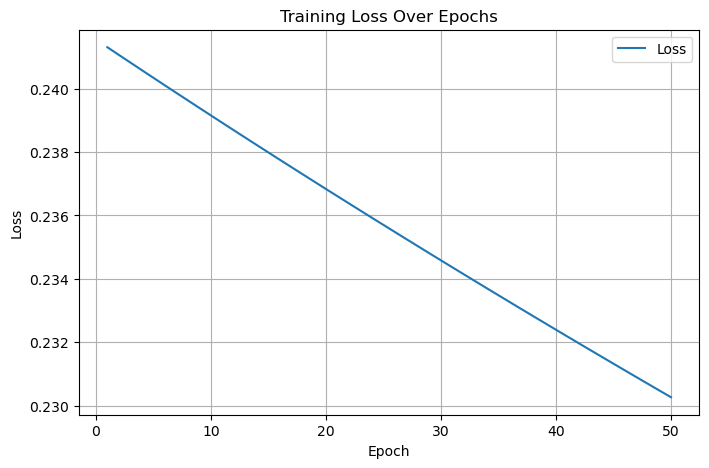

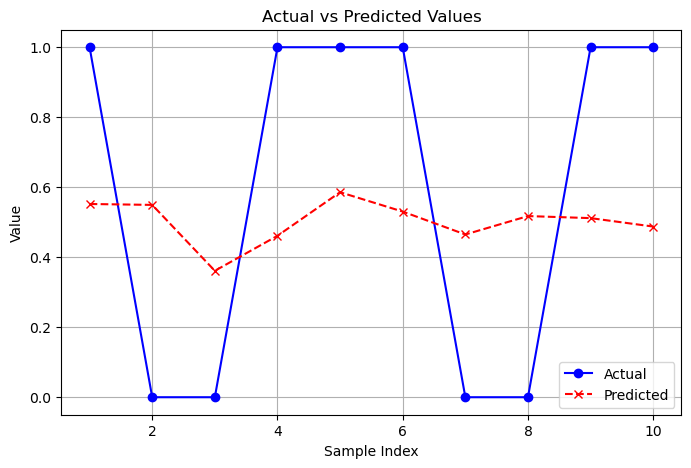

In [6]:
"""
可视化代码：
"""

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0], 
                  [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
    nn.ReLU(),            # 隐藏层的ReLU激活函数
    nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
    nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 用于存储每轮的损失值
losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
    y_pred = model(x)  # 前向传播，计算预测值
    loss = criterion(y_pred, y)  # 计算损失
    losses.append(loss.item())  # 记录损失值
    print(f'Epoch [{epoch+1}/50], Loss: {loss.item():.4f}')  # 打印损失值

    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

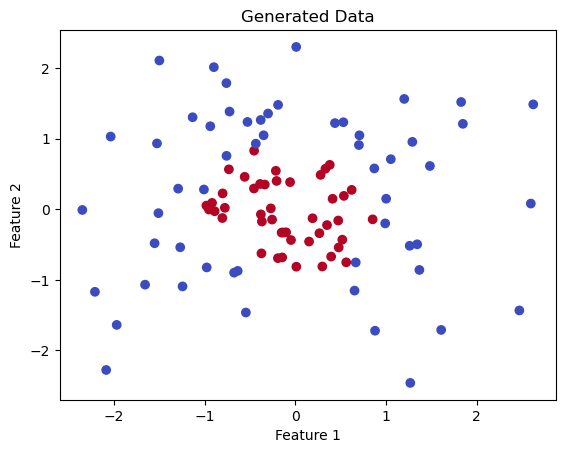

'\n数据说明：\n\ndata 是输入的二维点，每个点有两个特征。\nlabels 是目标分类，点在圆形区域内为 1，否则为 0。\n'

In [9]:
"""
另外一个实例
我们假设有一个二维数据集，目标是根据点的位置将它们分类到两个类别中（例如，红色和蓝色点）。

以下实例展示了如何使用神经网络完成简单的二分类任务，为更复杂的任务奠定了基础，通过 PyTorch 的模块化接口，神经网络的构建、训练和可视化都非常直观。

1、数据准备
首先，我们生成一些简单的二维数据：
"""
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""
数据说明：

data 是输入的二维点，每个点有两个特征。
labels 是目标分类，点在圆形区域内为 1，否则为 0。
"""

In [10]:
"""
2、定义神经网络
用 PyTorch 创建一个简单的前馈神经网络。

前馈神经网络使用了一层隐藏层，通过简单的线性变换和激活函数捕获数据的非线性模式。
"""

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

# 实例化模型
model = SimpleNN()

In [12]:
"""
3、定义损失函数和优化器
"""
# 定义二分类的损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

In [14]:
"""
4、训练模型
用数据训练模型，让它学会分类。
"""

# 训练
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.7096
Epoch [20/100], Loss: 0.6954
Epoch [30/100], Loss: 0.6854
Epoch [40/100], Loss: 0.6772
Epoch [50/100], Loss: 0.6702
Epoch [60/100], Loss: 0.6635
Epoch [70/100], Loss: 0.6570
Epoch [80/100], Loss: 0.6504
Epoch [90/100], Loss: 0.6438
Epoch [100/100], Loss: 0.6373


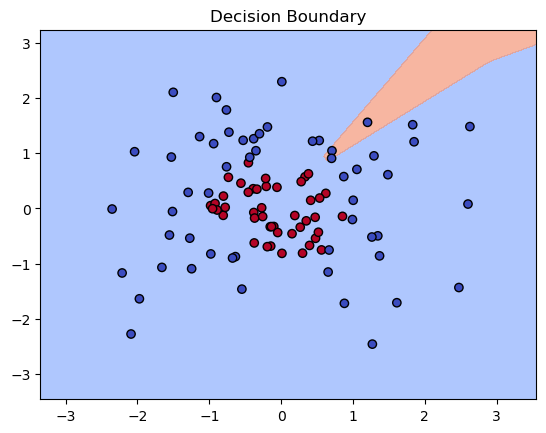

In [15]:
"""
5、测试模型并可视化结果
我们测试模型，并在图像上绘制决策边界。
"""
# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, data)

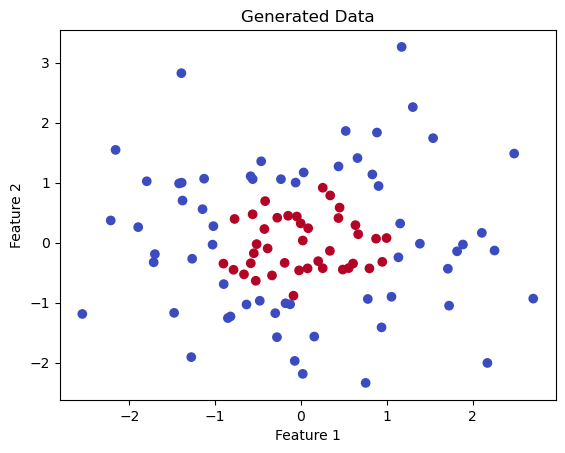

Epoch [10/100], Loss: 0.6707
Epoch [20/100], Loss: 0.6495
Epoch [30/100], Loss: 0.6361
Epoch [40/100], Loss: 0.6258
Epoch [50/100], Loss: 0.6168
Epoch [60/100], Loss: 0.6083
Epoch [70/100], Loss: 0.6002
Epoch [80/100], Loss: 0.5923
Epoch [90/100], Loss: 0.5846
Epoch [100/100], Loss: 0.5771


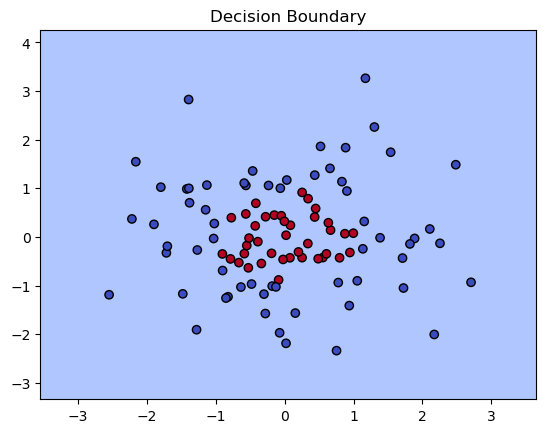

In [17]:
"""
6、完整代码
"""
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 定义前馈神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

# 实例化模型
model = SimpleNN()

# 定义损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

# 训练
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, data)

In [27]:
"""
ReLU（Rectified Linear Unit，线性整流单元）激活函数是深度学习中常用的一种激活函数。它的数学表达式非常简单：
    
    f(x)=max(0,x)

具体来说，ReLU 激活函数的作用如下：

非线性：ReLU 为神经网络引入了非线性因素。由于神经网络的基本组成——多层感知机（MLP）——是线性的，如果不在网络中引入非线性激活函数，那么无论多少层的网络，
其输出仍然是输入的线性组合，这限制了网络的表达能力。ReLU 通过引入非线性，使得神经网络可以捕捉更复杂的特征和模式。
稀疏性：当输入小于0时，ReLU 的输出为0。这导致网络中的一部分神经元在特定输入下不激活，从而使得网络的输出更加稀疏。稀疏性可以减少参数之间的依赖性，
有助于减轻过拟合问题。
计算效率：ReLU 的计算非常简单，只需要比较输入和0的大小，然后取最大值。相比于其他复杂的激活函数（如Sigmoid或Tanh），ReLU 的计算更加高效。
缓解梯度消失问题：在反向传播过程中，ReLU 的梯度要么是0（当输入小于0时），要么是1（当输入大于0时）。这意味着在正向传播过程中，只要输入大于0，
梯度就不会因为链式法则而逐层减小，这在一定程度上缓解了梯度消失问题。

以下是 ReLU 激活函数的图形表示：

Input: x
Output: f(x)

Output (f(x))
 ^
 |
 |                   __
 |                  |  |
 |                  |  |
 |                  |  |
 |                  |  |
 |                  |  |
 |                  |  |
 |__________________|__|_________> Input (x)
在这个图中，横轴代表输入值x, 纵轴代表输出值f(x),ReLU激活函数的图形是一个折线，当输入x小于0时，输出f(x)为0；当输入x大于或等于0时，输出f(x)等于输入x,所以图形在 
x轴的负半部分是水平的，而在正半部分是斜率为1的直线。


ReLU 激活函数在深度学习中的应用非常广泛，尤其是在卷积神经网络（CNN）中。然而，ReLU 也有一些缺点，例如“死神经元”问题，即某些神经元可能永远无法激活（输出始终为0），
这可能会导致网络的表达能力下降。为了解决这个问题，研究者们提出了许多 ReLU 的变体，如 Leaky ReLU、Parametric ReLU (PReLU)、ELU (Exponential Linear Units) 等。
"""

import torch 
x = torch.randn(2, 2)
print(x)
y = torch.relu(x)
print(y)

tensor([[ 0.4446,  0.0951],
        [-0.4139, -0.9844]])
tensor([[0.4446, 0.0951],
        [0.0000, 0.0000]])
